# Multi-Class Classification Demo

In the example below, we will use the famous Iris dataset found in the datasets package in Python.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Datasets

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
# reset data to DataFrame
df = pd.DataFrame(iris.data)

# label columns
df.columns = iris.feature_names

# Set price column for target
df['Species'] = iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# return flower name from the numerical class
flower_class = {0:'Setosa',1:'Veriscolour',2:'Virginica'}

df['Species_Name'] = df['Species'].replace(flower_class)

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,Species_Name
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


## Primary Visualization 

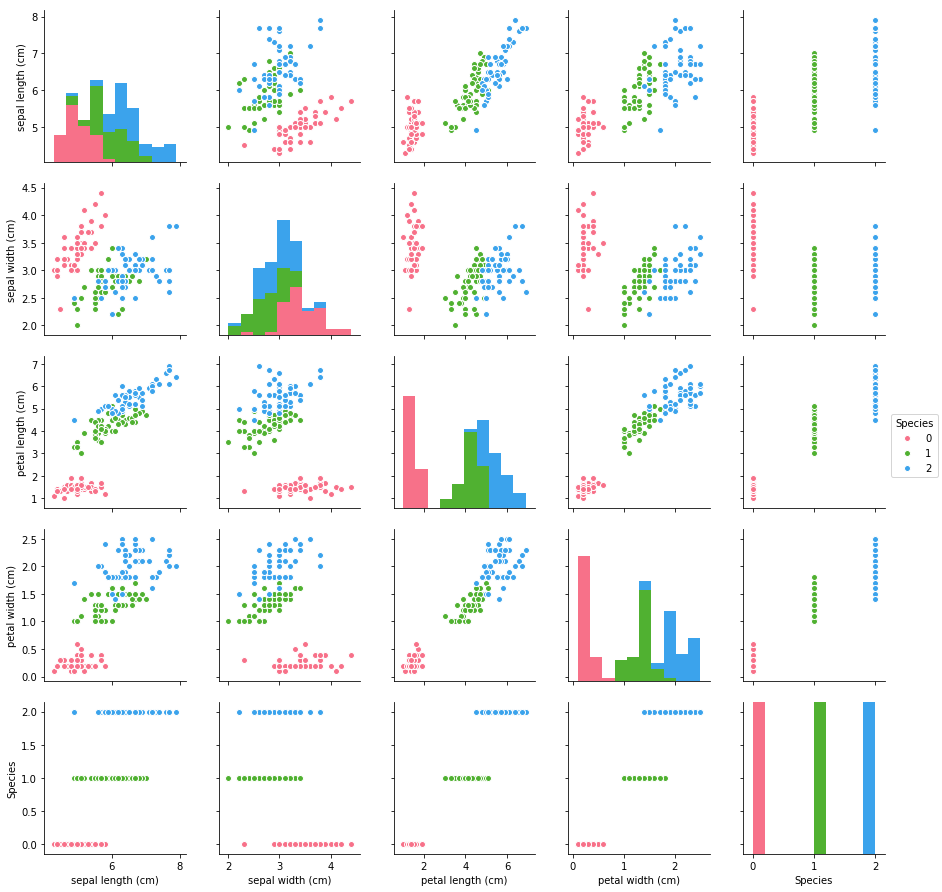

In [6]:
# Pairplot of all features
sns.pairplot(df.iloc[:,0:5],hue='Species',palette="husl")
plt.show()

* Iris type Setosa has the most distinct features out of the three types.
* The petal length and width has the most variance among the three types.

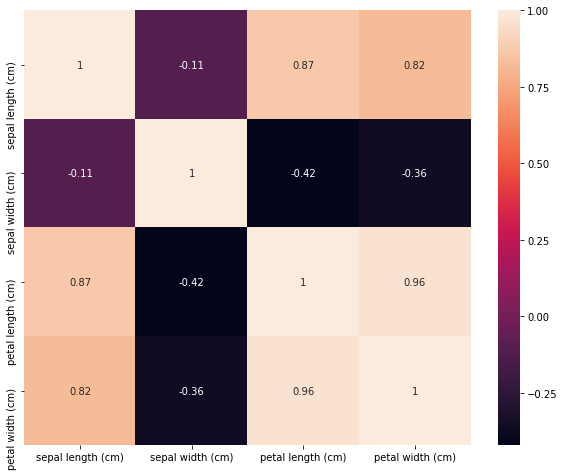

In [7]:
# Correlation Matrix
corrmat = df.iloc[:,0:4].corr()
plt.figure(figsize = (10,8))
sns.heatmap(data=corrmat,annot=True)
plt.show()

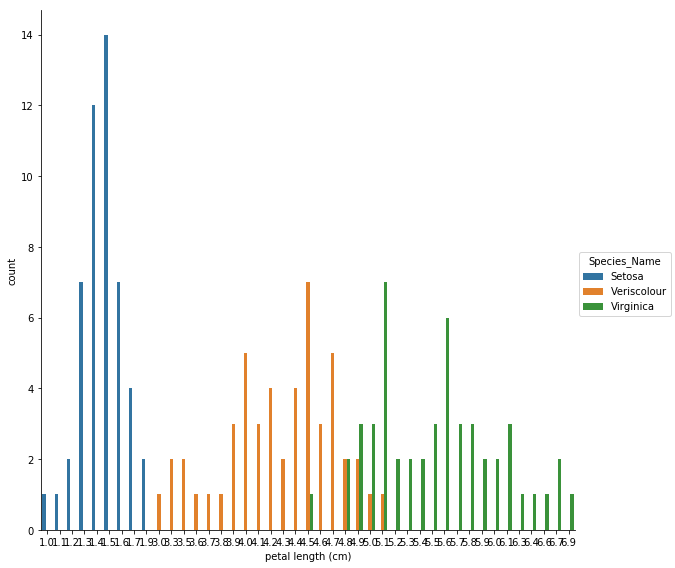

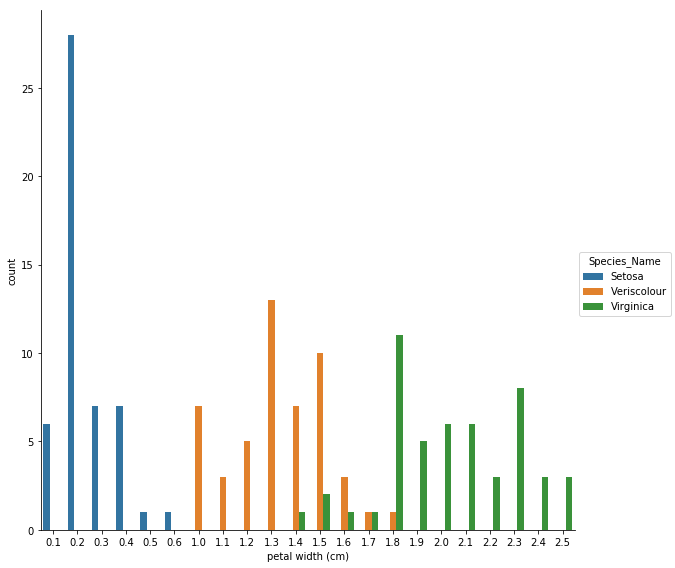

In [8]:
sns.factorplot('petal length (cm)',data=df,hue='Species_Name',size=8,kind='count')
sns.factorplot('petal width (cm)',data=df,hue='Species_Name',size=8,kind='count')

# Use Scikit-Learn Logistic Regression to solve Multi-Class Classification Problem

In [9]:
# Import Logistic Regression Package
import sklearn
from sklearn.linear_model import LogisticRegression

In [9]:
# Data Matrix
X = df.iloc[:,0:4]

# Targets
Y = df.Species

In [10]:
# Train-Test Split to validate the model
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

E:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Print shapes of the training and testing data sets
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [12]:
# Create a LinearRegression Object
lgr = LogisticRegression(solver='liblinear',multi_class='ovr')

In [13]:
# Implement Linear Regression
lgr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Show the coefficient of each column
coeff = pd.DataFrame(df.columns)
coeff.columns = ["Features"]
coeff["Coefficient Estimate"] = pd.Series(lgr.coef_[0])
coeff

,Features,Coefficient Estimate
0,sepal length (cm),0.422792
1,sepal width (cm),1.325828
2,petal length (cm),-2.140897
3,petal width (cm),-1.009322
4,Species,NaN
5,Species_Name,NaN


In [15]:
# Predictions on training set and testing set by using the fitted logistic model
pred_train = lgr.predict(X_train)
pred_test = lgr.predict(X_test)

In [16]:
# Use Accuracy to evaluate our model
from sklearn import metrics
print("Accuracy on Training Dataset is %.2f" %metrics.accuracy_score(Y_train, pred_train))
print("Accuracy on Testing Dataset is %.2f" %metrics.accuracy_score(Y_test, pred_test))

Accuracy on Training Dataset is 0.97
Accuracy on Testing Dataset is 1.00
